In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/topguns837/Tabular_Playground_March_2022/master/train.csv'  , index_col=False)
test = pd.read_csv('https://raw.githubusercontent.com/topguns837/Tabular_Playground_March_2022/master/test.csv' , index_col = False)

In [ ]:
train.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


In [ ]:
train.isnull().sum()

row_id        0
time          0
x             0
y             0
direction     0
congestion    0
dtype: int64

In [ ]:
 test.isnull().sum()

row_id       0
time         0
x            0
y            0
direction    0
dtype: int64

In [ ]:
train['time'].max()

'1991-09-30 11:40:00'

In [ ]:
train['time'].min()

'1991-04-01 00:00:00'

Note :  The year (1991) holds no importance here since it is constant in all of the train and test data

In [ ]:
train['Date'] = pd.to_datetime(train['time']).dt.date
train['Time'] = pd.to_datetime(train['time']).dt.time

In [ ]:
train.dtypes


row_id         int64
time          object
x              int64
y              int64
direction     object
congestion     int64
Date          object
Time          object
dtype: object

In [ ]:
train.head()

,row_id,time,x,y,direction,congestion,Date,Time
0,0,1991-04-01 00:00:00,0,0,EB,70,1991-04-01,00:00:00
1,1,1991-04-01 00:00:00,0,0,NB,49,1991-04-01,00:00:00
2,2,1991-04-01 00:00:00,0,0,SB,24,1991-04-01,00:00:00
3,3,1991-04-01 00:00:00,0,1,EB,18,1991-04-01,00:00:00
4,4,1991-04-01 00:00:00,0,1,NB,60,1991-04-01,00:00:00


In [ ]:
#train_test['Date'] = train['Date'].str[5:]
train_df = train.copy()
train_df['Month'] = pd.DatetimeIndex(train['Date']).month
train_df['Day'] = pd.DatetimeIndex(train['Date']).day
train_df.head()

,row_id,time,x,y,direction,congestion,Date,Time,Month,Day
0,0,1991-04-01 00:00:00,0,0,EB,70,1991-04-01,00:00:00,4,1
1,1,1991-04-01 00:00:00,0,0,NB,49,1991-04-01,00:00:00,4,1
2,2,1991-04-01 00:00:00,0,0,SB,24,1991-04-01,00:00:00,4,1
3,3,1991-04-01 00:00:00,0,1,EB,18,1991-04-01,00:00:00,4,1
4,4,1991-04-01 00:00:00,0,1,NB,60,1991-04-01,00:00:00,4,1


In [ ]:
train_df.drop(['Date'] , axis = 1 , inplace = True)


In [ ]:
train_df.drop(['time'] , axis = 1 , inplace= True)
train_df.head()

,row_id,x,y,direction,congestion,Time,Month,Day
0,0,0,0,EB,70,00:00:00,4,1
1,1,0,0,NB,49,00:00:00,4,1
2,2,0,0,SB,24,00:00:00,4,1
3,3,0,1,EB,18,00:00:00,4,1
4,4,0,1,NB,60,00:00:00,4,1


In [ ]:
# Congestion vs Month

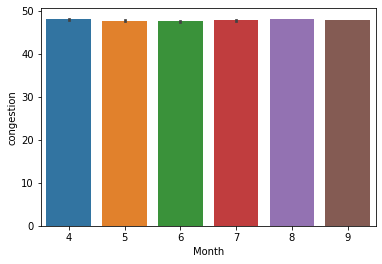

In [ ]:
sns.barplot(x = 'Month' , y = 'congestion' , data = train_df , estimator = np.mean)

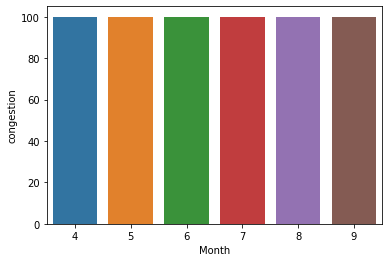

In [ ]:
sns.barplot(x = 'Month' , y = 'congestion' , data = train_df , estimator = np.max)

Note :  Congestion doesnt depend on the Month

In [ ]:
# Congestion vs Day

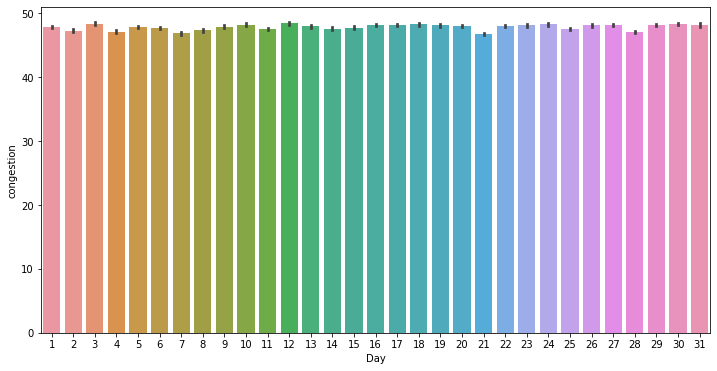

In [ ]:
plt.figure(figsize = (12,6))

sns.barplot(x = 'Day' , y = 'congestion' , data = train_df , estimator = np.mean)

plt.show()

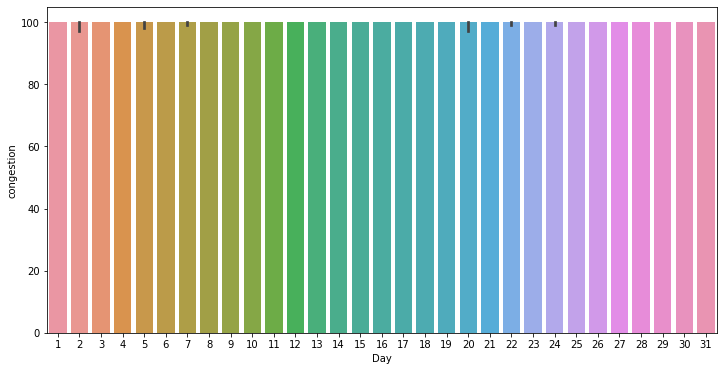

In [ ]:
plt.figure(figsize = (12,6))

sns.barplot(x = 'Day' , y = 'congestion' , data = train_df , estimator = np.max)

plt.show()

Note  :  Congestion varies slightly with Day

In [ ]:
## Consider adding a Date variable (without Year)


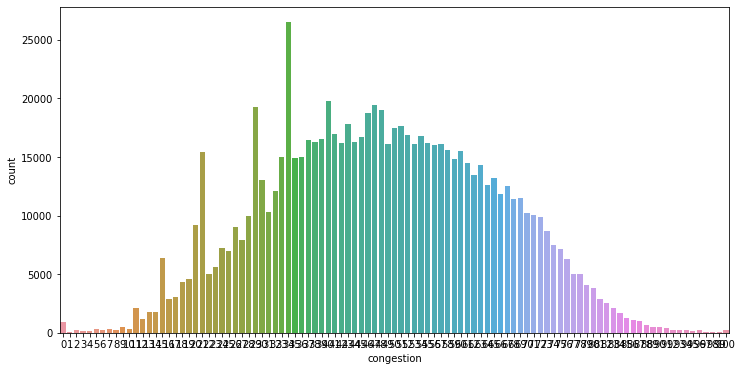

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data = train_df , x = 'congestion' )
#plt.xticks(rotation = 45)
plt.show()

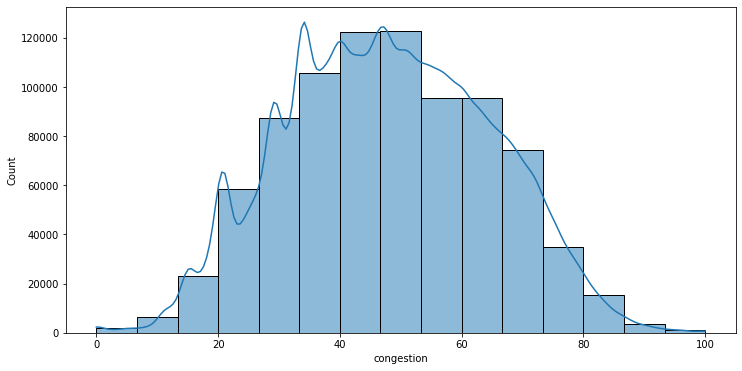

In [ ]:
plt.figure(figsize = (12,6))
sns.histplot(data = train_df , x = 'congestion' , bins = 15  , kde = True)
plt.show()

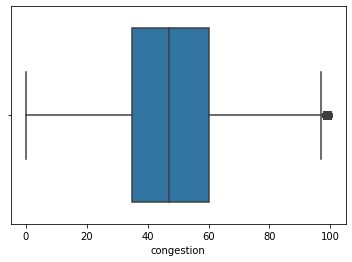

In [ ]:
sns.boxplot(data = train_df , x = 'congestion')

Note : There are a lot of outliers in our 'Congestion' column in train data

In [ ]:
train_df.head()

,row_id,x,y,direction,congestion,Time,Month,Day
0,0,0,0,EB,70,00:00:00,4,1
1,1,0,0,NB,49,00:00:00,4,1
2,2,0,0,SB,24,00:00:00,4,1
3,3,0,1,EB,18,00:00:00,4,1
4,4,0,1,NB,60,00:00:00,4,1


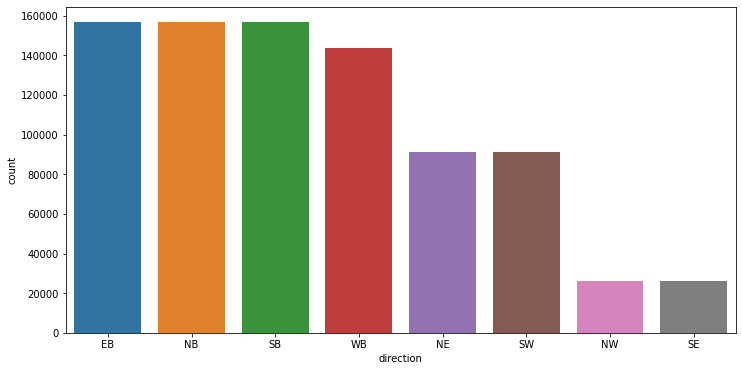

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data = train_df , x = 'direction' )
plt.show()

In [ ]:
train_df['direction'].value_counts(normalize=True)*100

EB    18.461538
NB    18.461538
SB    18.461538
WB    16.923077
NE    10.769231
SW    10.769231
NW     3.076923
SE     3.076923
Name: direction, dtype: float64

In [ ]:
## Finding relation between congestion and location cordinates

In [ ]:
train_df['x'].unique()

array([0, 1, 2])

In [ ]:
train_df['y'].unique()

array([0, 1, 2, 3])

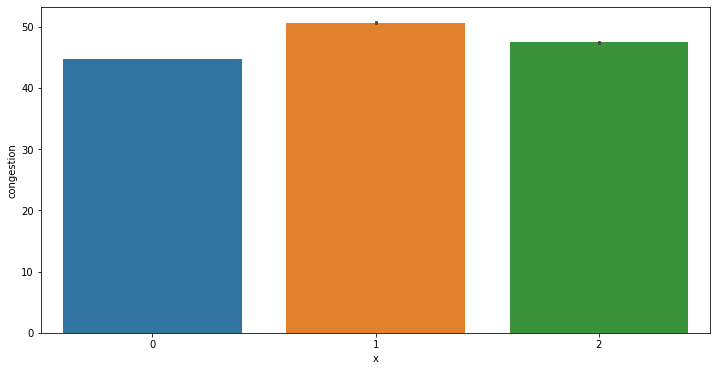

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(data = train_df , x = 'x' , y = 'congestion' , estimator = np.mean)
plt.show()

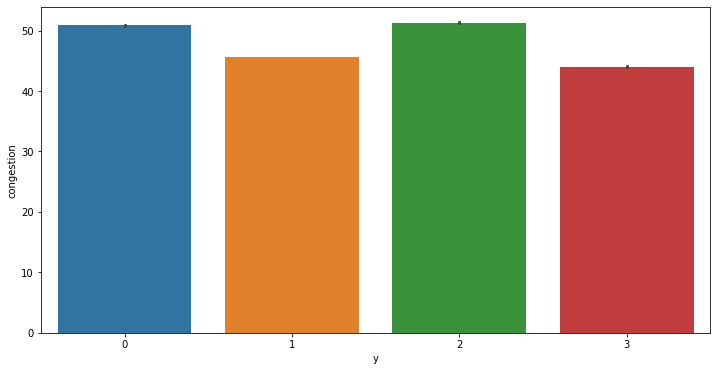

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(data = train_df , x = 'y' , y = 'congestion' , estimator = np.mean)
plt.show()

In [ ]:
## Trying out combination of (x,y) as a column

In [ ]:
train_df_copy = train_df.copy()
train_df_copy['location'] = [0]*len(train_df)

for index , row in train_df_copy.iterrows() :
  row['location'] = (row['x'] , row['y'])



In [ ]:
train_df_copy.head()

,row_id,x,y,direction,congestion,Time,Month,Day,location
0,0,0,0,EB,70,00:00:00,4,1,0
1,1,0,0,NB,49,00:00:00,4,1,0
2,2,0,0,SB,24,00:00:00,4,1,0
3,3,0,1,EB,18,00:00:00,4,1,0
4,4,0,1,NB,60,00:00:00,4,1,0


In [ ]:
train_df_copy['location'] = train_df_copy.apply(lambda row: (row.x , row.y), axis=1)
train_df_copy.head()

,row_id,x,y,direction,congestion,Time,Month,Day,location
0,0,0,0,EB,70,00:00:00,4,1,"(0, 0)"
1,1,0,0,NB,49,00:00:00,4,1,"(0, 0)"
2,2,0,0,SB,24,00:00:00,4,1,"(0, 0)"
3,3,0,1,EB,18,00:00:00,4,1,"(0, 1)"
4,4,0,1,NB,60,00:00:00,4,1,"(0, 1)"


In [ ]:
train_df = train_df_copy.copy() #How the tables have turned :)

In [ ]:
train_df['location'].value_counts(normalize = True)*100

(2, 1)    12.307692
(2, 2)    12.307692
(0, 3)     9.230769
(1, 0)     9.230769
(1, 2)     9.230769
(1, 3)     9.230769
(2, 3)     9.230769
(0, 1)     6.153846
(0, 2)     6.153846
(1, 1)     6.153846
(2, 0)     6.153846
(0, 0)     4.615385
Name: location, dtype: float64

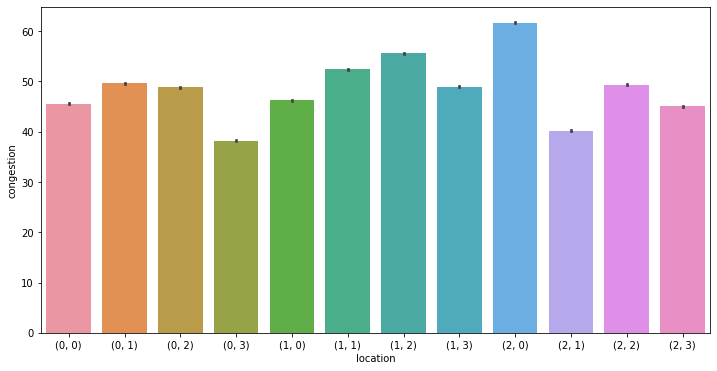

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(data = train_df , x = 'location' , y = 'congestion' , estimator = np.mean)
plt.show()

Note : Location would be a better feature than x or y individually

In [ ]:
train_df.drop(['x' , 'y'] , axis = 1 , inplace = True)
train_df.head(10)

,row_id,direction,congestion,Time,Month,Day,location
0,0,EB,70,00:00:00,4,1,"(0, 0)"
1,1,NB,49,00:00:00,4,1,"(0, 0)"
2,2,SB,24,00:00:00,4,1,"(0, 0)"
3,3,EB,18,00:00:00,4,1,"(0, 1)"
4,4,NB,60,00:00:00,4,1,"(0, 1)"
5,5,SB,58,00:00:00,4,1,"(0, 1)"
6,6,WB,26,00:00:00,4,1,"(0, 1)"
7,7,EB,31,00:00:00,4,1,"(0, 2)"
8,8,NB,49,00:00:00,4,1,"(0, 2)"
9,9,SB,46,00:00:00,4,1,"(0, 2)"


In [ ]:
## Understanding "Time" column

In [ ]:
train_df['Time'].unique()

array([datetime.time(0, 0), datetime.time(0, 20), datetime.time(0, 40),
       datetime.time(1, 0), datetime.time(1, 20), datetime.time(1, 40),
       datetime.time(2, 0), datetime.time(2, 20), datetime.time(2, 40),
       datetime.time(3, 0), datetime.time(3, 20), datetime.time(3, 40),
       datetime.time(4, 0), datetime.time(4, 20), datetime.time(4, 40),
       datetime.time(5, 0), datetime.time(5, 20), datetime.time(5, 40),
       datetime.time(6, 0), datetime.time(6, 20), datetime.time(6, 40),
       datetime.time(7, 0), datetime.time(7, 20), datetime.time(7, 40),
       datetime.time(8, 0), datetime.time(8, 20), datetime.time(8, 40),
       datetime.time(9, 0), datetime.time(9, 20), datetime.time(9, 40),
       datetime.time(10, 0), datetime.time(10, 20), datetime.time(10, 40),
       datetime.time(11, 0), datetime.time(11, 20), datetime.time(11, 40),
       datetime.time(12, 0), datetime.time(12, 20), datetime.time(12, 40),
       datetime.time(13, 0), datetime.time(13, 20), dat

In [ ]:
train_df['Time'].dtype

dtype('O')

In [ ]:
train_df['Time'][0].hour

0

In [ ]:
# Let's check if the 'hour' feature is of any use 

In [ ]:
train_df_copy = train_df.copy()

train_df_copy['Hour'] = train_df.apply(lambda row : row['Time'].hour , axis = 1)

train_df_copy.head()

,row_id,direction,congestion,Time,Month,Day,location,Hour
0,0,EB,70,00:00:00,4,1,"(0, 0)",0
1,1,NB,49,00:00:00,4,1,"(0, 0)",0
2,2,SB,24,00:00:00,4,1,"(0, 0)",0
3,3,EB,18,00:00:00,4,1,"(0, 1)",0
4,4,NB,60,00:00:00,4,1,"(0, 1)",0


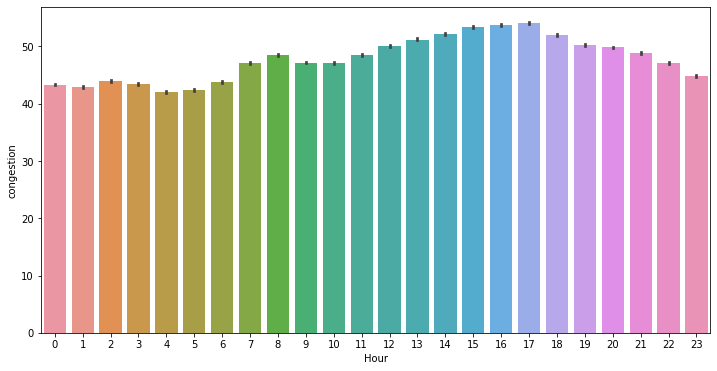

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(data = train_df_copy , x = 'Hour' ,y = 'congestion' ,estimator = np.mean)
plt.show()

Note  : 'Hour' feature will be useful

In [ ]:
train_df_copy.drop(['Time'] , axis = 1 , inplace=True)
train_df_copy.head()

,row_id,direction,congestion,Month,Day,location,Hour
0,0,EB,70,4,1,"(0, 0)",0
1,1,NB,49,4,1,"(0, 0)",0
2,2,SB,24,4,1,"(0, 0)",0
3,3,EB,18,4,1,"(0, 1)",0
4,4,NB,60,4,1,"(0, 1)",0


In [ ]:
train_df = train_df_copy.copy()

In [ ]:
train_df['location'].nunique()

12

### Feature Engineering is Done :)

Stuff to be done -> 1) Check for missing values
                    2) Normalization
                    3) One-hot encoding for direction and location

In [ ]:
train_df.isnull().sum()

row_id        0
direction     0
congestion    0
Month         0
Day           0
location      0
Hour          0
dtype: int64

Note :  No missing values 

In [ ]:
X = train_df.drop(['congestion'] , axis = 1)
y = train_df['congestion']

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Columns to be normalized = ['congestion' , 'Month' , 'Day' , 'Hour']


Columns to be encoded = ['direction' , 'location']

## One-Hot Encoding

In [ ]:
X_encoded = pd.get_dummies(data = X )
X_encoded.head()

,row_id,Month,Day,Hour,direction_EB,direction_NB,direction_NE,direction_NW,direction_SB,direction_SE,...,"location_(0, 2)","location_(0, 3)","location_(1, 0)","location_(1, 1)","location_(1, 2)","location_(1, 3)","location_(2, 0)","location_(2, 1)","location_(2, 2)","location_(2, 3)"
0,0,4,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_encoded.drop(['Month' , 'Day' , 'Hour'] , axis = 1 , inplace = True)
X_encoded.head()

,row_id,direction_EB,direction_NB,direction_NE,direction_NW,direction_SB,direction_SE,direction_SW,direction_WB,"location_(0, 0)",...,"location_(0, 2)","location_(0, 3)","location_(1, 0)","location_(1, 1)","location_(1, 2)","location_(1, 3)","location_(2, 0)","location_(2, 1)","location_(2, 2)","location_(2, 3)"
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalization / Scaling

In [ ]:
# Using Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaler.fit(X[['Month' ,'Day' ,'Hour']])


X_scaled = pd.DataFrame(scaler.fit_transform(X[['Month' ,'Day' ,'Hour']]) , columns = ['Month' ,'Day' ,'Hour'])

X_scaled.head(10)

,Month,Day,Hour
0,-1.467375,-1.671268,-1.657262
1,-1.467375,-1.671268,-1.657262
2,-1.467375,-1.671268,-1.657262
3,-1.467375,-1.671268,-1.657262
4,-1.467375,-1.671268,-1.657262
5,-1.467375,-1.671268,-1.657262
6,-1.467375,-1.671268,-1.657262
7,-1.467375,-1.671268,-1.657262
8,-1.467375,-1.671268,-1.657262
9,-1.467375,-1.671268,-1.657262


In [ ]:
X_cleaned = pd.concat([X_scaled , X_encoded] , axis = 1)
X_cleaned.head()

,Month,Day,Hour,row_id,direction_EB,direction_NB,direction_NE,direction_NW,direction_SB,direction_SE,...,"location_(0, 2)","location_(0, 3)","location_(1, 0)","location_(1, 1)","location_(1, 2)","location_(1, 3)","location_(2, 0)","location_(2, 1)","location_(2, 2)","location_(2, 3)"
0,-1.467375,-1.671268,-1.657262,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.467375,-1.671268,-1.657262,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.467375,-1.671268,-1.657262,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.467375,-1.671268,-1.657262,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.467375,-1.671268,-1.657262,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_cleaned.isnull().sum()

Month              0
Day                0
Hour               0
row_id             0
direction_EB       0
direction_NB       0
direction_NE       0
direction_NW       0
direction_SB       0
direction_SE       0
direction_SW       0
direction_WB       0
location_(0, 0)    0
location_(0, 1)    0
location_(0, 2)    0
location_(0, 3)    0
location_(1, 0)    0
location_(1, 1)    0
location_(1, 2)    0
location_(1, 3)    0
location_(2, 0)    0
location_(2, 1)    0
location_(2, 2)    0
location_(2, 3)    0
dtype: int64

### Features have been scaled

-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-

In [ ]:
## Train and test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_valid , y_train , y_valid = train_test_split(X_cleaned , y , random_state = 42)

In [ ]:
len(X_train) , len(X_valid)

(636626, 212209)

In [ ]:
len(y_train) , len(y_valid)

(636626, 212209)

In [ ]:
# Save X_cleaned and y for future uses
train_df_clean = pd.concat([X_cleaned  , y] , axis = 1)
train_df_clean.to_csv('train_df_clean.csv' , index = False)

In [ ]:
train_df_clean.isnull().sum()

Month              0
Day                0
Hour               0
row_id             0
direction_EB       0
direction_NB       0
direction_NE       0
direction_NW       0
direction_SB       0
direction_SE       0
direction_SW       0
direction_WB       0
location_(0, 0)    0
location_(0, 1)    0
location_(0, 2)    0
location_(0, 3)    0
location_(1, 0)    0
location_(1, 1)    0
location_(1, 2)    0
location_(1, 3)    0
location_(2, 0)    0
location_(2, 1)    0
location_(2, 2)    0
location_(2, 3)    0
congestion         0
dtype: int64

-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

# Time to fit some models and evaluate their MAE
##   1) Linear Regressor
##   2) XGboost
##   3) RandomForest
##   4) Deep Learning Model

###1) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train , y_train)

y_preds_lr = lr.predict(X_valid)

In [ ]:
from sklearn.metrics import mean_absolute_error

lr_mae = mean_absolute_error(y_valid , y_preds_lr)
print("MAE in baseline Linear Regressor" , lr_mae)

MAE in baseline Linear Regressor 11.537223061793602


### 2) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train , y_train )

y_preds_rm = rf.predict(X_valid)



In [ ]:
from sklearn.metrics import mean_absolute_error

rf_mae = mean_absolute_error(y_valid , y_preds_rm)
print("MAE in baseline Random Forest Rgressor" , rf_mae)

MAE in baseline Random Forest Rgressor 6.186060299044811


###3) XGBoost 

In [ ]:
import xgboost

xgboost = xgboost.XGBRegressor()

xgboost.fit(X_train , y_train )

y_preds_xg = xgboost.predict(X_valid)

[14:53:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_absolute_error

xgboost_mae = mean_absolute_error(y_valid , y_preds_xg)
print("MAE in baseline XGBoost Regressor" , xgboost_mae)

MAE in baseline XGBoost Regressor 9.169595056295837


In [ ]:
### Saving baseline models for future uses
import pickle


In [ ]:
pickle.dump(lr, open('baseline_linear_regressor.h5' , 'wb'))


In [ ]:
pickle.dump(rf, open('baseline_randomforest_regressor.h5' , 'wb'))

In [ ]:
pickle.dump(xgboost, open('baseline_xgboost_regressor.h5' , 'wb'))

### 4) Deep Learning model

In [ ]:
import pandas as pd

train_df_loaded = pd.read_csv('https://raw.githubusercontent.com/topguns837/Tabular_Playground_Kaggle_Mar_2022/master/Cleaned%20Data/train_df_clean.csv')

In [ ]:
X_loaded = train_df_loaded.drop(['congestion'] , axis = 1)
y_loaded = train_df_loaded['congestion']

In [ ]:
from sklearn.model_selection import train_test_split

X_train_loaded , X_valid_loaded , y_train_loaded , y_valid_loaded = train_test_split(X_loaded , y_loaded , random_state = 42)

In [ ]:
import tensorflow as tf

#1. Set random seed
tf.random.set_seed(42)

#2. Build a model

dl_model = tf.keras.Sequential([
                                tf.keras.layers.Dense(8 , activation = 'relu') ,
                                tf.keras.layers.Dense(32 , activation = 'relu') , 
                                tf.keras.layers.Dense(32 , activation = 'relu') , 
                                tf.keras.layers.Dense(16 , activation = 'tanh') ,
                                #tf.keras.layers.Dense(4,activation = 'elu') ,
                                tf.keras.layers.Dense(1 , activation = 'relu')
])

#3. Compile the model
dl_model.compile(loss = 'mae' , 
                 optimizer = tf.keras.optimizers.Adam() ,
                 metrics = ['mae'])

#4. Fit the model
dl_model.fit(X_train_loaded , y_train_loaded , epochs = 10 ,
             validation_data = [X_valid_loaded , y_valid_loaded])

Epoch 1/10
19895/19895 [==============================] - 62s 3ms/step - loss: 15.7851 - mae: 15.7851 - val_loss: 13.8532 - val_mae: 13.8532
Epoch 2/10
19895/19895 [==============================] - 72s 4ms/step - loss: 13.8747 - mae: 13.8747 - val_loss: 13.8543 - val_mae: 13.8543
Epoch 3/10
19895/19895 [==============================] - 62s 3ms/step - loss: 13.8757 - mae: 13.8757 - val_loss: 13.8561 - val_mae: 13.8561
Epoch 4/10
19895/19895 [==============================] - 62s 3ms/step - loss: 13.8751 - mae: 13.8751 - val_loss: 13.8531 - val_mae: 13.8531
Epoch 5/10
19895/19895 [==============================] - 65s 3ms/step - loss: 13.8810 - mae: 13.8810 - val_loss: 13.8549 - val_mae: 13.8549
Epoch 6/10
19895/19895 [==============================] - 61s 3ms/step - loss: 13.8753 - mae: 13.8753 - val_loss: 13.8562 - val_mae: 13.8562
Epoch 7/10
19895/19895 [==============================] - 76s 4ms/step - loss: 13.8877 - mae: 13.8877 - val_loss: 13.8529 - val_mae: 13.8529
Epoch 8/10
19

In [ ]:
dl_model.save('baseline_dl_model.h5')

### Transform test data and use baseline RandomForest for initial submission in Kaggle

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/topguns837/Tabular_Playground_March_2022/master/test.csv' , index_col = False)

In [ ]:
test.head()

,row_id,time,x,y,direction
0,848835,1991-09-30 12:00:00,0,0,EB
1,848836,1991-09-30 12:00:00,0,0,NB
2,848837,1991-09-30 12:00:00,0,0,SB
3,848838,1991-09-30 12:00:00,0,1,EB
4,848839,1991-09-30 12:00:00,0,1,NB


In [ ]:
test.isnull().sum()

row_id       0
time         0
x            0
y            0
direction    0
dtype: int64

In [ ]:
test['Date'] = pd.to_datetime(test['time']).dt.date
test['Time'] = pd.to_datetime(test['time']).dt.time

In [ ]:
test.dtypes


row_id        int64
time         object
x             int64
y             int64
direction    object
Date         object
Time         object
dtype: object

In [ ]:
test_df = test.copy()
test_df['Month'] = pd.DatetimeIndex(test['Date']).month
test_df['Day'] = pd.DatetimeIndex(test['Date']).day
test_df.head()

,row_id,time,x,y,direction,Date,Time,Month,Day
0,848835,1991-09-30 12:00:00,0,0,EB,1991-09-30,12:00:00,9,30
1,848836,1991-09-30 12:00:00,0,0,NB,1991-09-30,12:00:00,9,30
2,848837,1991-09-30 12:00:00,0,0,SB,1991-09-30,12:00:00,9,30
3,848838,1991-09-30 12:00:00,0,1,EB,1991-09-30,12:00:00,9,30
4,848839,1991-09-30 12:00:00,0,1,NB,1991-09-30,12:00:00,9,30


In [ ]:
test_df.drop(['Date'] , axis = 1 , inplace = True)

In [ ]:
test_df.drop(['time'] , axis = 1 , inplace= True)
test_df.head()

,row_id,x,y,direction,Time,Month,Day
0,848835,0,0,EB,12:00:00,9,30
1,848836,0,0,NB,12:00:00,9,30
2,848837,0,0,SB,12:00:00,9,30
3,848838,0,1,EB,12:00:00,9,30
4,848839,0,1,NB,12:00:00,9,30


In [ ]:
test_df_copy = test_df.copy()
test_df_copy['location'] = [0]*len(test_df)

for index , row in test_df_copy.iterrows() :
  row['location'] = (row['x'] , row['y'])

In [ ]:
test_df_copy['location'] = test_df_copy.apply(lambda row: (row.x , row.y), axis=1)
test_df_copy.head()

,row_id,x,y,direction,Time,Month,Day,location
0,848835,0,0,EB,12:00:00,9,30,"(0, 0)"
1,848836,0,0,NB,12:00:00,9,30,"(0, 0)"
2,848837,0,0,SB,12:00:00,9,30,"(0, 0)"
3,848838,0,1,EB,12:00:00,9,30,"(0, 1)"
4,848839,0,1,NB,12:00:00,9,30,"(0, 1)"


In [ ]:
test_df = test_df_copy.copy()

In [ ]:
test_df['location'].value_counts(normalize = True)*100

(2, 1)    12.307692
(2, 2)    12.307692
(0, 3)     9.230769
(1, 0)     9.230769
(1, 2)     9.230769
(1, 3)     9.230769
(2, 3)     9.230769
(0, 1)     6.153846
(0, 2)     6.153846
(1, 1)     6.153846
(2, 0)     6.153846
(0, 0)     4.615385
Name: location, dtype: float64

In [ ]:
test_df.drop(['x' , 'y'] , axis = 1 , inplace = True)
test_df.head(10)

,row_id,direction,Time,Month,Day,location
0,848835,EB,12:00:00,9,30,"(0, 0)"
1,848836,NB,12:00:00,9,30,"(0, 0)"
2,848837,SB,12:00:00,9,30,"(0, 0)"
3,848838,EB,12:00:00,9,30,"(0, 1)"
4,848839,NB,12:00:00,9,30,"(0, 1)"
5,848840,SB,12:00:00,9,30,"(0, 1)"
6,848841,WB,12:00:00,9,30,"(0, 1)"
7,848842,EB,12:00:00,9,30,"(0, 2)"
8,848843,NB,12:00:00,9,30,"(0, 2)"
9,848844,SB,12:00:00,9,30,"(0, 2)"


In [ ]:
test_df_copy = test_df.copy()

test_df_copy['Hour'] = test_df.apply(lambda row : row['Time'].hour , axis = 1)

test_df_copy.head()

,row_id,direction,Time,Month,Day,location,Hour
0,848835,EB,12:00:00,9,30,"(0, 0)",12
1,848836,NB,12:00:00,9,30,"(0, 0)",12
2,848837,SB,12:00:00,9,30,"(0, 0)",12
3,848838,EB,12:00:00,9,30,"(0, 1)",12
4,848839,NB,12:00:00,9,30,"(0, 1)",12


In [ ]:
test_df_copy.drop(['Time'] , axis = 1 , inplace=True)
test_df_copy.head()

,row_id,direction,Month,Day,location,Hour
0,848835,EB,9,30,"(0, 0)",12
1,848836,NB,9,30,"(0, 0)",12
2,848837,SB,9,30,"(0, 0)",12
3,848838,EB,9,30,"(0, 1)",12
4,848839,NB,9,30,"(0, 1)",12


In [ ]:
test_df = test_df_copy.copy()

In [ ]:
test_df_encoded = pd.get_dummies(data = test_df )
test_df_encoded.head()

,row_id,Month,Day,Hour,direction_EB,direction_NB,direction_NE,direction_NW,direction_SB,direction_SE,...,"location_(0, 2)","location_(0, 3)","location_(1, 0)","location_(1, 1)","location_(1, 2)","location_(1, 3)","location_(2, 0)","location_(2, 1)","location_(2, 2)","location_(2, 3)"
0,848835,9,30,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,848836,9,30,12,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,848837,9,30,12,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,848838,9,30,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,848839,9,30,12,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df_encoded.drop(['Month' , 'Day' , 'Hour'] , axis = 1 , inplace = True)
test_df_encoded.head()

,row_id,direction_EB,direction_NB,direction_NE,direction_NW,direction_SB,direction_SE,direction_SW,direction_WB,"location_(0, 0)",...,"location_(0, 2)","location_(0, 3)","location_(1, 0)","location_(1, 1)","location_(1, 2)","location_(1, 3)","location_(2, 0)","location_(2, 1)","location_(2, 2)","location_(2, 3)"
0,848835,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,848836,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,848837,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,848838,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,848839,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler.fit(X[['Month' ,'Day' ,'Hour']])

StandardScaler()

In [ ]:
#test_scaled = scaler.transform(test_df[['Month' ,'Day' ,'Hour']])

test_scaled = pd.DataFrame(scaler.transform(test_df[['Month' ,'Day' ,'Hour']]) , columns = ['Month' ,'Day' ,'Hour'])

In [ ]:
test_scaled.head()

,Month,Day,Hour
0,1.480423,1.626896,0.07521
1,1.480423,1.626896,0.07521
2,1.480423,1.626896,0.07521
3,1.480423,1.626896,0.07521
4,1.480423,1.626896,0.07521


In [ ]:
test_cleaned = pd.concat([test_scaled , test_df_encoded] , axis = 1)
test_cleaned.head()

,Month,Day,Hour,row_id,direction_EB,direction_NB,direction_NE,direction_NW,direction_SB,direction_SE,...,"location_(0, 2)","location_(0, 3)","location_(1, 0)","location_(1, 1)","location_(1, 2)","location_(1, 3)","location_(2, 0)","location_(2, 1)","location_(2, 2)","location_(2, 3)"
0,1.480423,1.626896,0.07521,848835,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.480423,1.626896,0.07521,848836,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.480423,1.626896,0.07521,848837,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.480423,1.626896,0.07521,848838,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.480423,1.626896,0.07521,848839,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Saving test data

test_cleaned.to_csv('test_cleaned.csv')

### Predicting on test data using RandomForest 



In [ ]:
### Limiting max_depth to 6 for a new and more light-weight RandomForest model

from sklearn.ensemble import RandomForestRegressor

rf_new = RandomForestRegressor(max_depth = 6)

rf_new.fit(X_train , y_train )




In [ ]:
y_preds_rf_new = rf_new.predict(X_valid)

In [ ]:
from sklearn.metrics import mean_absolute_error

rf_new_mae = mean_absolute_error(y_valid , y_preds_rf_new)
print("MAE in baseline RandomFores Regressor" , rf_new_mae)

MAE in baseline RandomFores Regressor 11.113057932525475


In [ ]:
y_test = rf_new.predict(test_cleaned)

AttributeError: ignored

In [ ]:
test_cleaned.head()

,Month,Day,Hour,row_id,direction_EB,direction_NB,direction_NE,direction_NW,direction_SB,direction_SE,...,"location_(0, 2)","location_(0, 3)","location_(1, 0)","location_(1, 1)","location_(1, 2)","location_(1, 3)","location_(2, 0)","location_(2, 1)","location_(2, 2)","location_(2, 3)"
0,1.480423,1.626896,0.07521,848835,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.480423,1.626896,0.07521,848836,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.480423,1.626896,0.07521,848837,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.480423,1.626896,0.07521,848838,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.480423,1.626896,0.07521,848839,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(test_cleaned) , len(y_test)

(2340, 2340)

In [ ]:
y_submit = pd.concat([test_cleaned['row_id'] , pd.DataFrame(y_test)] , axis = 1)

In [ ]:
y_submit.head()

,row_id,0
0,848835,49.999718
1,848836,49.999718
2,848837,51.326381
3,848838,49.999718
4,848839,49.999718


In [ ]:
y_submit.columns = ['row_id' , 'congestion']
y_submit.head()

,row_id,congestion
0,848835,49.999718
1,848836,49.999718
2,848837,51.326381
3,848838,49.999718
4,848839,49.999718


In [ ]:
y_submit.to_csv('first_submission.csv' , index = False) 

In [ ]:
## Note : New RandomForest gives an MAE score of 10.617 on Kaggle

In [ ]:
## Using old RandomForest model :)

In [ ]:
y_test = rf.predict(test_cleaned)

In [ ]:
y_submit = pd.concat([test_cleaned['row_id'] , pd.DataFrame(y_test)] , axis = 1)

In [ ]:
y_submit.columns = ['row_id' , 'congestion']
y_submit.head()

,row_id,congestion
0,848835,60.32
1,848836,37.34
2,848837,56.93
3,848838,26.39
4,848839,67.13


In [ ]:
y_submit.to_csv('rf_baseline.csv' , index = False)

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = [6]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               #'max_depth': 6,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor( n_jobs = -1)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, random_state=42)


rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
### Making new model using parameters from Grid Search

In [ ]:
new_rf = RandomForestRegressor()

new_rf.set_params(**rf_random.best_params_)

### Submission using new RF Model

In [ ]:
y_test = rf.predict(test_cleaned)

In [ ]:
y_submit = pd.concat([test_cleaned['row_id'] , pd.DataFrame(y_test)] , axis = 1)

In [ ]:
y_submit.columns = ['row_id' , 'congestion']
y_submit.head()

In [ ]:
y_submit.to_csv('rf_new_cv.csv' , index = False)

In [ ]:
from google.colab import files
files.download('rf_new_cv.csv')

### Hyperparameter Tuning for XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBRegressor

parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

xgb_model = XGBRegressor(random_state=30)

grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters, cv=5,n_iter=15,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
grid_obj_xgb.fit(X_train, y_train,verbose = 1)




Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
grid_obj_xgb.best_params_

In [ ]:
### Ridge and Lasso Regression